<a href="https://colab.research.google.com/github/SathishRathod7/Code-Alpha-Task2/blob/main/Code_Alpha_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# Correct the file path
file_path = '/content/Unemployment_Rate_upto_11_2020.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
print("Original Column Names:")
print(df.columns)

Original Column Names:
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
print("\nCleaned Column Names:")
print(df.columns)


Cleaned Column Names:
Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [ ]:
if 'Date' in df.columns:
    df['Date'] = df['Date'].str.strip()

    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

    print("\nData types after conversion:")
    print(df.dtypes)

    df.head()
else:
    print("The 'Date' column was not found. Please check the dataset for any discrepancies.")


Data types after conversion:
Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Region.1                                           object
longitude                                         float64
latitude                                          float64
dtype: object


In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
missing_values

Missing values in each column:


,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [ ]:
print("\nSummary statistics:")
df.describe()


Summary statistics:


,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,41.681573,22.826048,80.532425
min,2020-01-31 00:00:00,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,2020-10-31 00:00:00,75.850000,5.943376e+07,69.690000,33.778200,92.937600
std,NaN,10.803283,1.336632e+07,7.845419,6.270731,5.831738


In [ ]:
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate',
    'Region.1': 'Region_Category'
}, inplace=True)

In [ ]:
df.head()

,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Region_Category,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

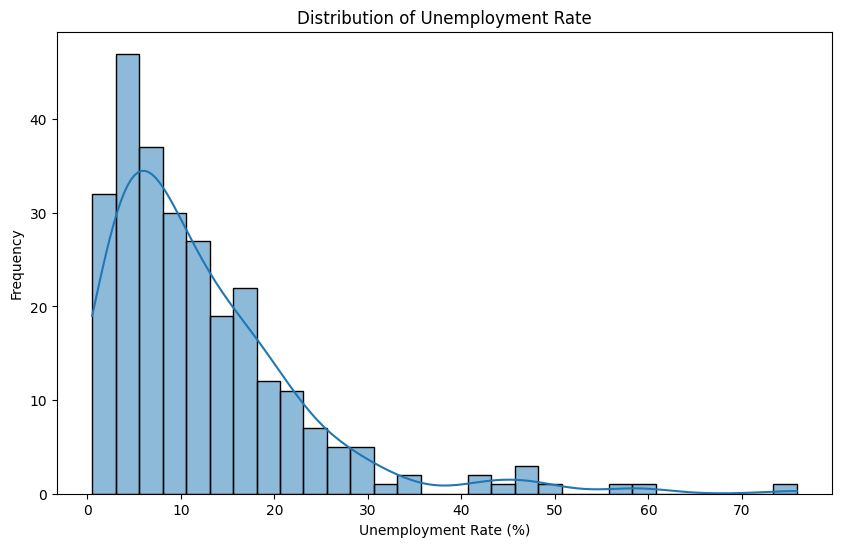

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Unemployment_Rate'], bins=30, kde=True)
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

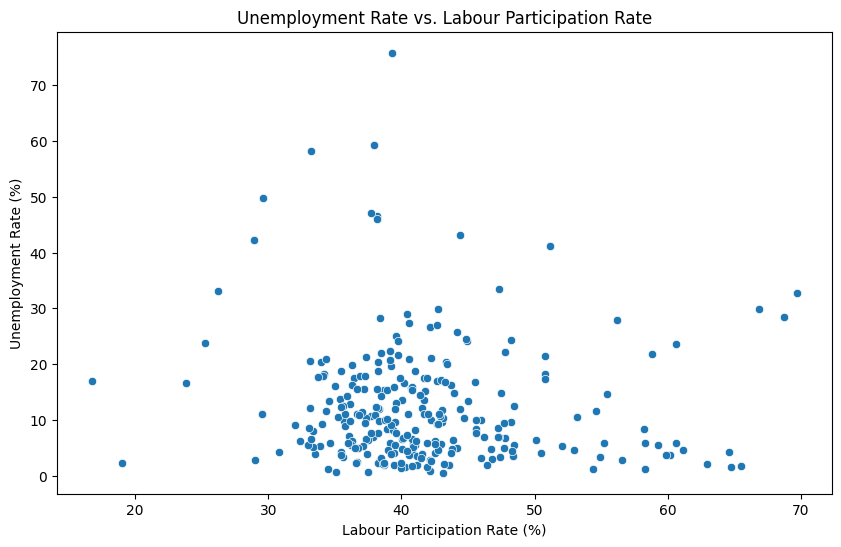

Correlation between Labour Participation Rate and Unemployment Rate: -0.07


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Labour_Participation_Rate', y='Unemployment_Rate', data=df)
plt.title('Unemployment Rate vs. Labour Participation Rate')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.show()

correlation = df['Labour_Participation_Rate'].corr(df['Unemployment_Rate'])
print(f"Correlation between Labour Participation Rate and Unemployment Rate: {correlation:.2f}")

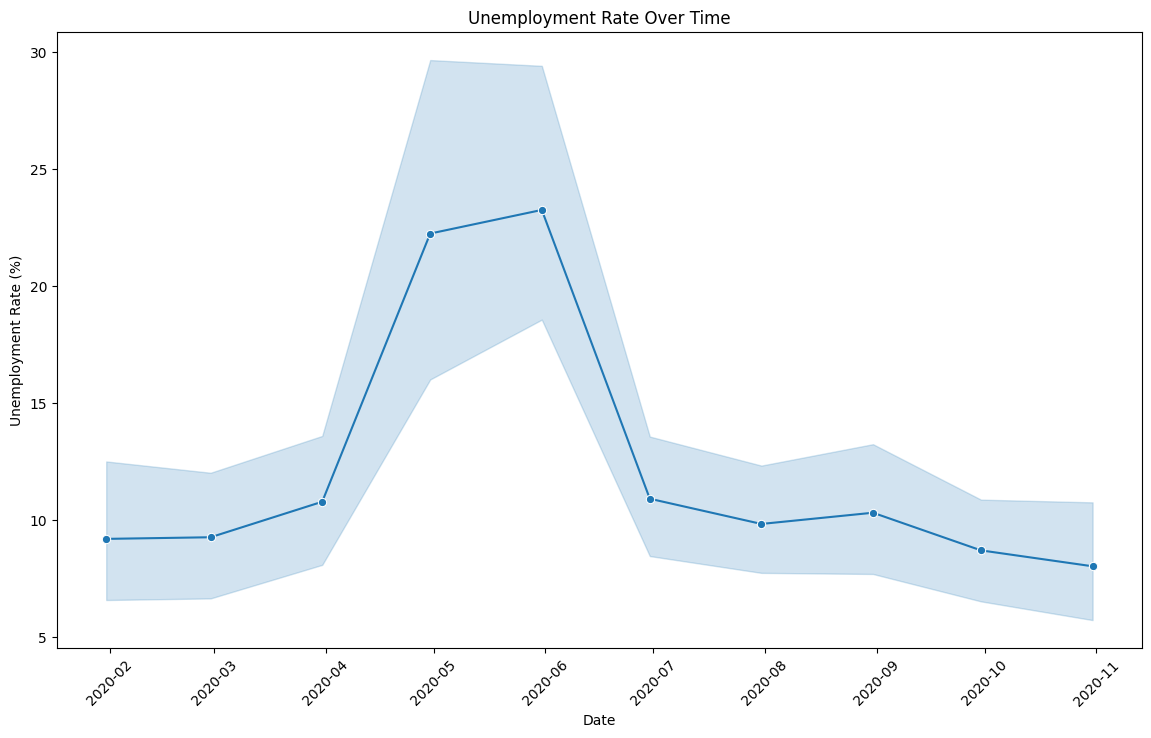

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Unemployment_Rate', data=df, marker='o')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

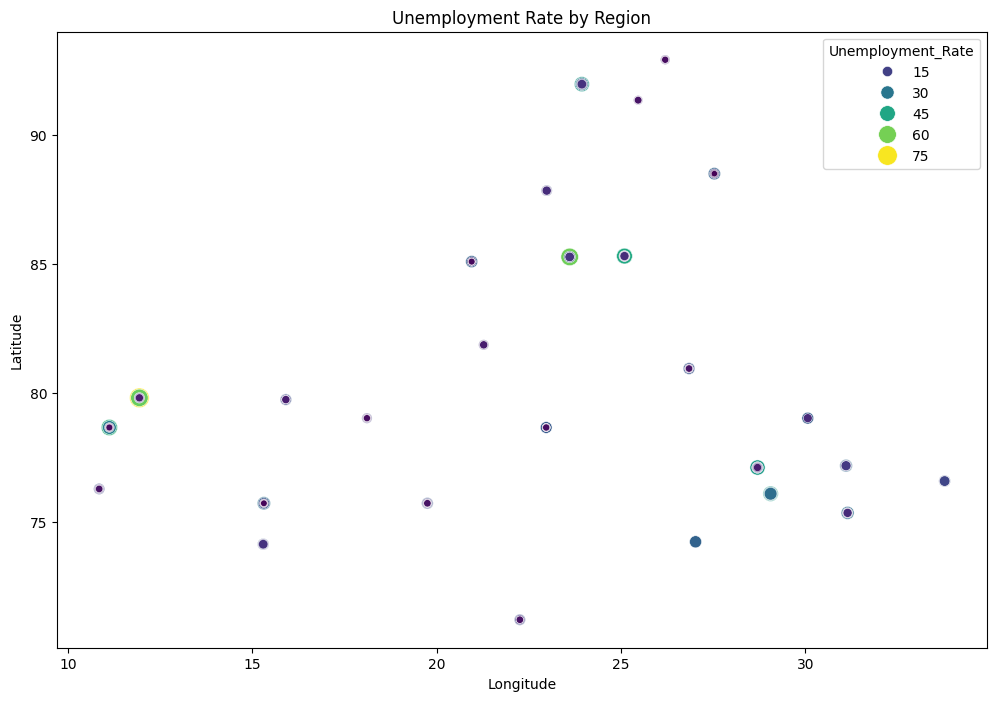

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='Unemployment_Rate', size='Unemployment_Rate', data=df, palette='viridis', sizes=(20, 200))
plt.title('Unemployment Rate by Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
from scipy.stats import f_oneway

regions = df['Region_Category'].unique()
anova_data = [df[df['Region_Category'] == region]['Unemployment_Rate'] for region in regions]

anova_result = f_oneway(*anova_data)
print(f"ANOVA test result: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in unemployment rates across regions.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in unemployment rates across regions.")

ANOVA test result: F-statistic = 5.04, p-value = 0.0006
Result: Reject the null hypothesis. There is a significant difference in unemployment rates across regions.


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Labour_Participation_Rate', 'Employed', 'longitude', 'latitude']]
y = df['Unemployment_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 186
Test set size: 81


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 91.05
R-squared (R2): -0.03


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Model - Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"Polynomial Model - R-squared (R2): {r2_poly:.2f}")

Polynomial Model - Mean Squared Error (MSE): 79.51
Polynomial Model - R-squared (R2): 0.10


In [ ]:
final_model = model

y_final_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_final_pred)
final_r2 = r2_score(y_test, y_final_pred)

print(f"Final Model - Mean Squared Error (MSE): {final_mse:.2f}")
print(f"Final Model - R-squared (R2): {final_r2:.2f}")

Final Model - Mean Squared Error (MSE): 91.05
Final Model - R-squared (R2): -0.03
